# Учимся работе с данными - от загрузки до моделирования.

Импортируем нужные модули.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

C:\Users\mikhail.klyazhev\Anaconda\envs\ds_base\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Загрузим данные, посмотрим на начало и конец датафрейма, для того, чтобы понимать, что именно в нем находится.  

In [2]:
df = pd.read_csv(r'BreastCancerWisconsin.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Столбец id не является признаком, а содержит уникальные идентификаторы каждого объекта наблюдений. Поэтому можно сразу выбросить его из данных вместе с ненужным столбцом Unnamed: 32.  

In [4]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

Проверим, есть ли в данных пропуски.  

In [5]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Как видим, пустых значений в датафрейме нет.  

Посмотрим на названия признаков, если они осмысленные, чтобы понять что за данные мы анализируем.

In [6]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Видим, что названия некоторых признаков дублируются 3 раза с добавлением различных постфиксов. Очень вероятно, что от части признаков придется отказаться.  

Прочитаем в описании данных, что значат приписки.  
`The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.`  

Проверим, какой тип имеет каждый признак.  

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Проверим, требуется ли нормировка для данных. Для этого посмотрим на статистики по признакам. 

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Видно, что данные в разном масштабе, поэтому запомним, что нам нужна нормировка. Приступим к ней чуть позже, когда определимся с тем, какие признаки стоит выбросить из данных.  

Целевая переменная - Diagnosis, типа object. Посмотрим, что за задача перед нами стоит. Для этого проверим количество уникальных диагнозов.  

In [9]:
pd.unique(df['diagnosis'])

array(['M', 'B'], dtype=object)

Как видно, перед нами задача бинарной классификации, т.к. целевых классов всего 2. Проверим в описании датасета, что значат эти буквы.  
`M = malignant (злокачественный), B = benign (доброкачественный)`  

Будем считать, что нас интересует выявление злокачественных образований. Поэтому, во время преобразования целевого признака, M закодируем, как 1, а B, как 0.  

In [10]:
df['diagnosis'].replace({'M' : 1, 'B' : 0}, inplace=True)

Теперь нужно определить какие признаки стоит исключить.  

Для начала отберем "mean" признаки.  

In [11]:
y_column = 'diagnosis'
X_columns = [col for col in df.columns if col != y_column]
X_columns

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

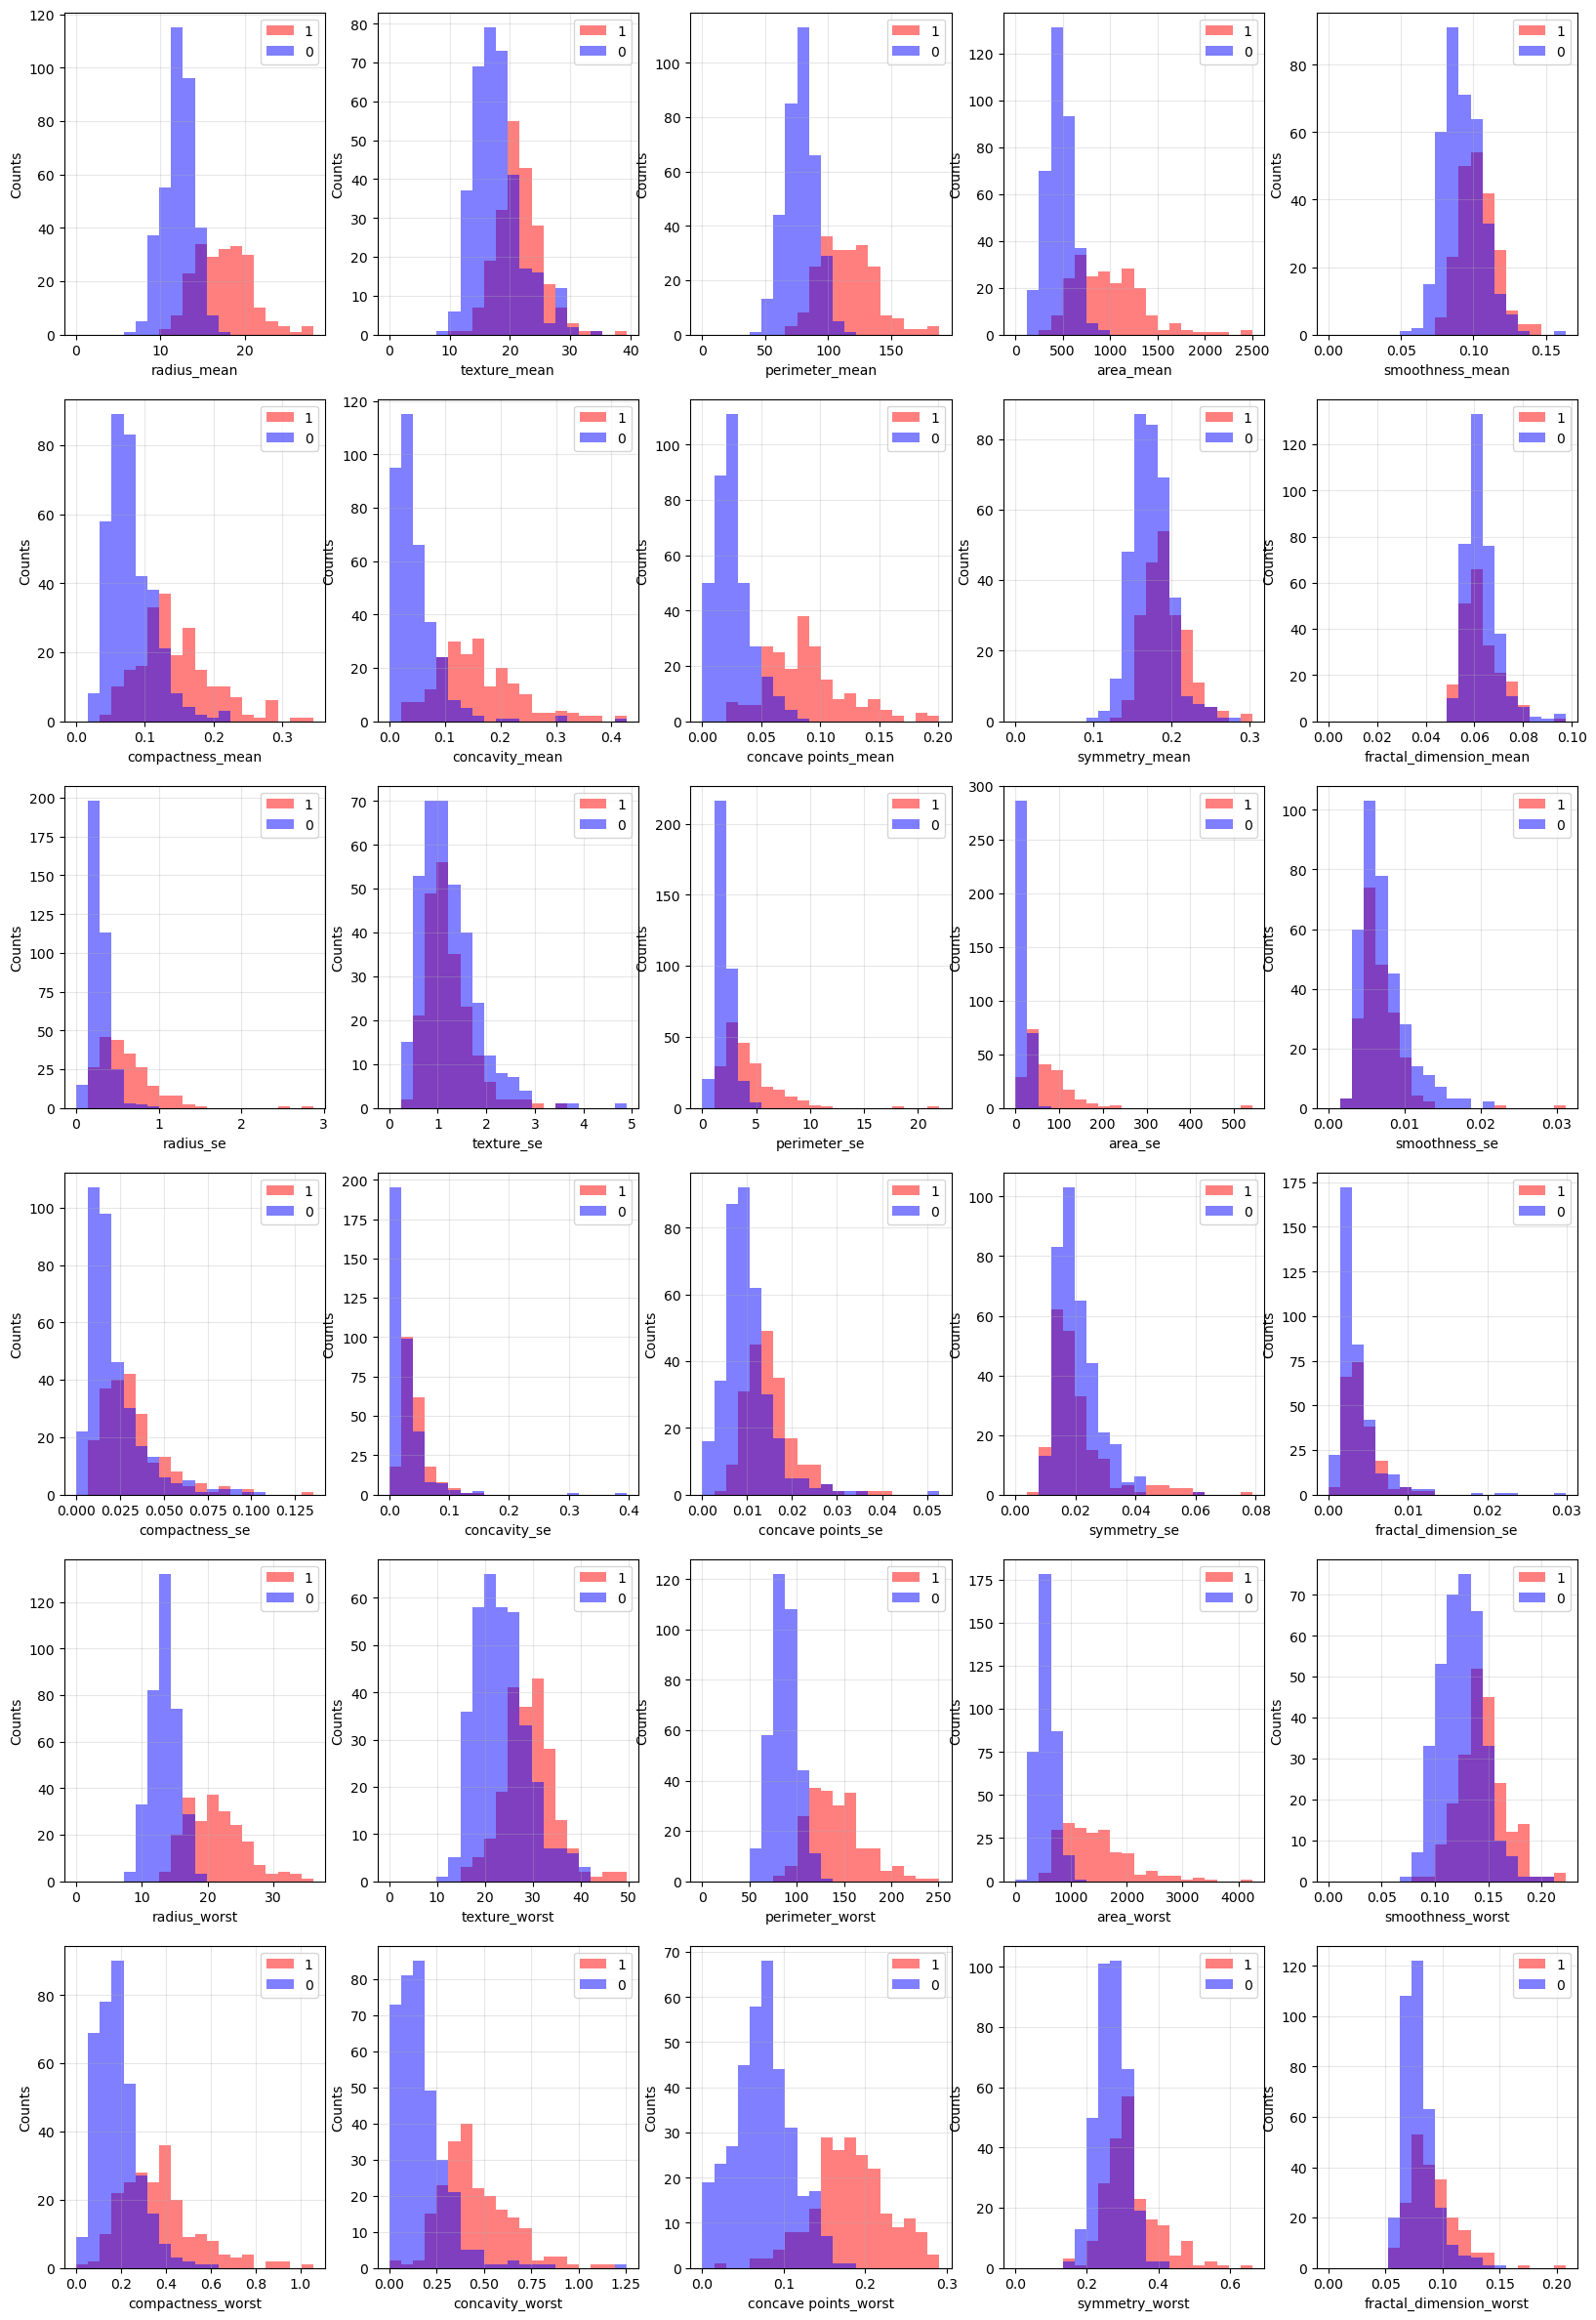

In [12]:
# Определяем размер фигуры
plt.figure(figsize=(20, 30))

# Цикл по каждому признаку
for i_col in range(len(X_columns)):
    
    # Создаем график для каждого признака
    plt.subplot(6, 5, i_col+1)
    
    # Получаем значения признака и целевой переменной
    x_col = df[X_columns[i_col]].values
    y_col = df[y_column].values
    
    # Строим гистограмму
    bins = np.linspace(0, x_col.max(), 21)
    plt.grid(alpha = 0.3)
    plt.hist(x_col[y_col == 1], bins=bins, color='r', alpha=0.5, label='1')
    plt.hist(x_col[y_col == 0], bins=bins, color='b', alpha=0.5, label='0')
    
    # Подписываем оси и легенду
    plt.xlabel(X_columns[i_col])
    plt.ylabel('Counts')
    plt.legend(loc='best')
    
plt.show()

Контраст виден для следующих признаков: radius, perimeter, area, concavity, concave points.  

Видно, что "worst" графики практически идентичны "mean" признакам. Убедимся в сильной корелляции между "mean" и "worst", для этого построим матрицу корелляции.  

In [13]:
# Отберем только топ-8 коррелирующих признаков для читабельности графика
k = 8
corrmat = df.corr()
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index.tolist()
cols

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean']

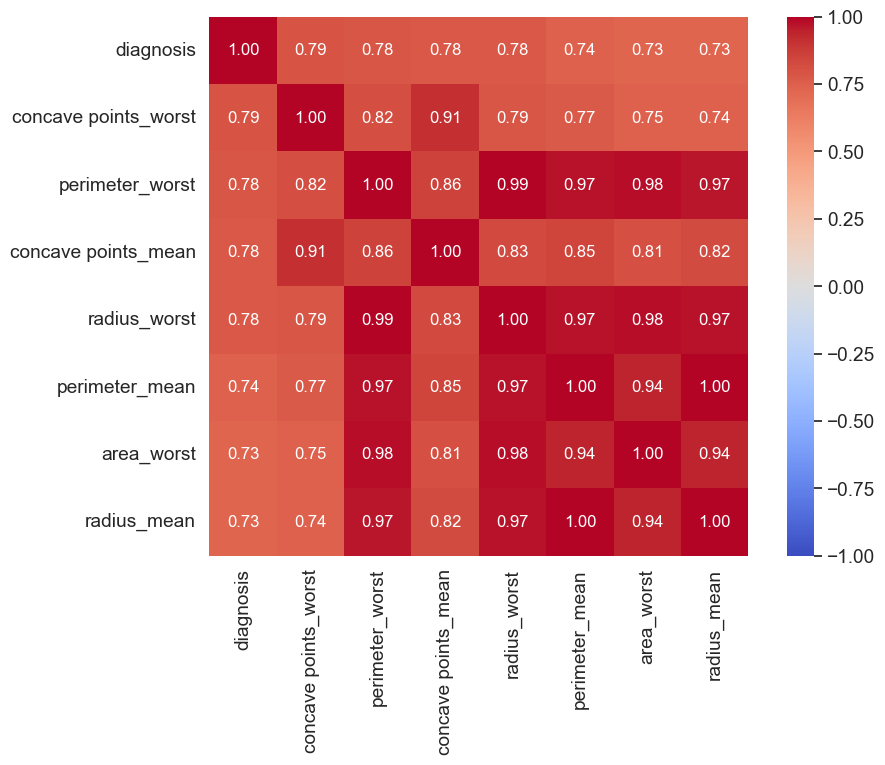

In [14]:
cm = np.corrcoef(df[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

Как и ожидалось "mean" и "worst" сильно коррелируют между собой, кроме того, большую корреляцию имеют признаки относящиеся к размеру образования.  

Для полноты картины, построим еще графики попарных зависимостей для топ-8 признаков по корреляции.   

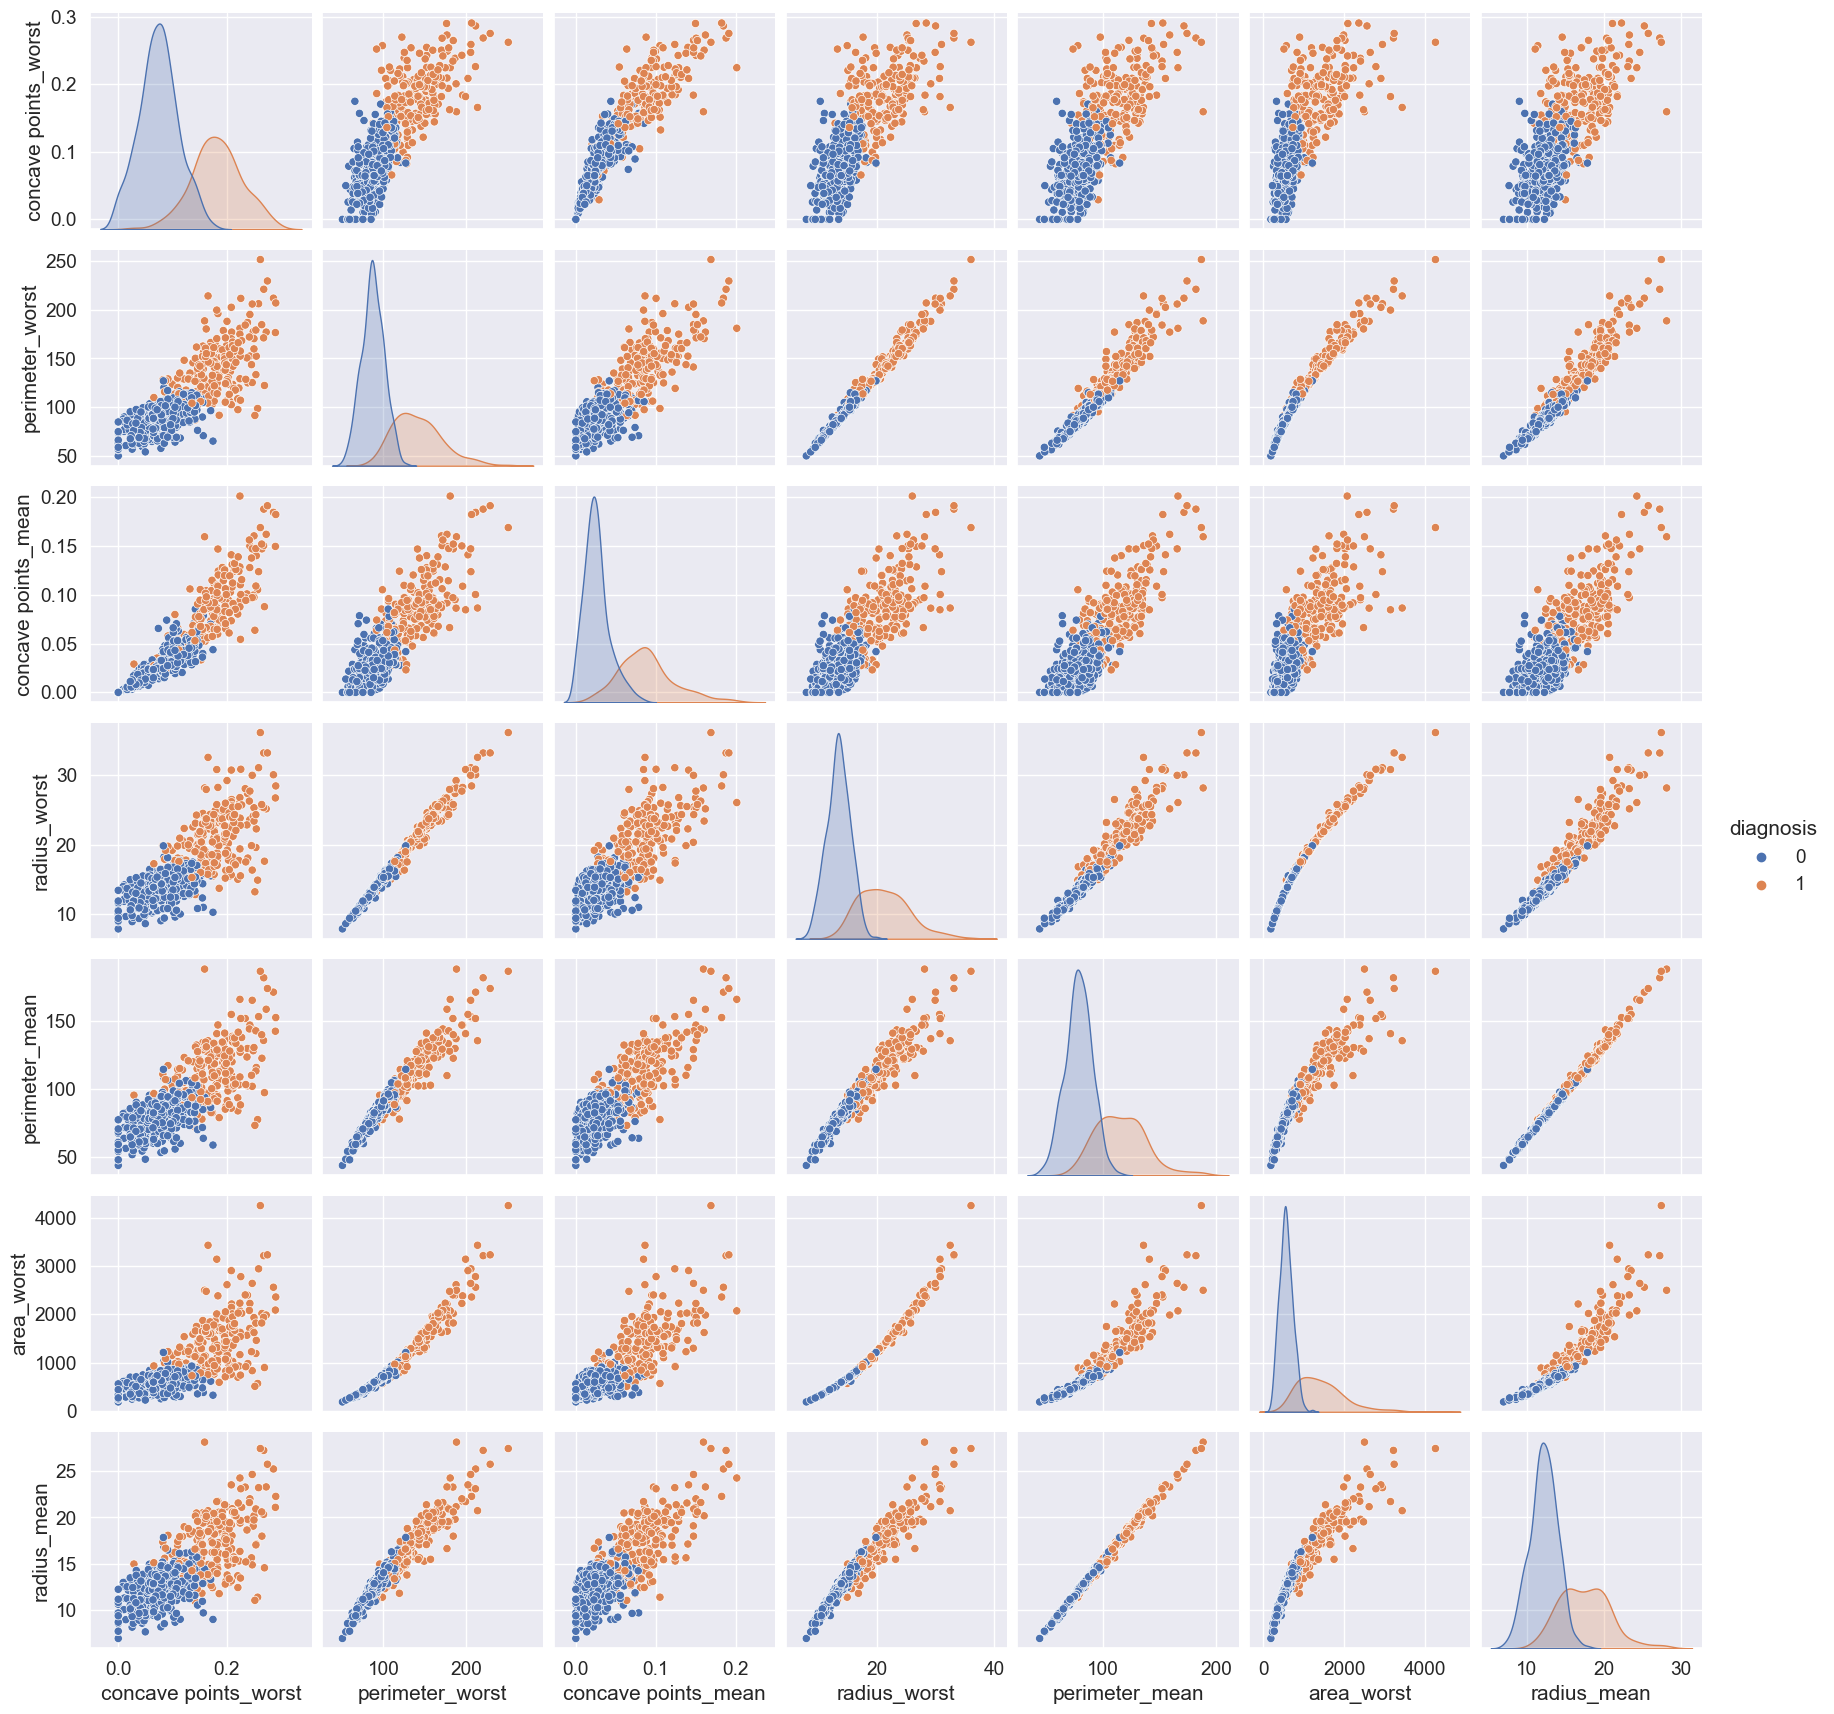

In [15]:
sns.pairplot(data=df[cols], hue='diagnosis')
plt.show()

Видно, что линейная зависимость действительно есть, поэтому определим, какие признаки стоит оставить с помощью boxplot'ов сгруппированных по значениям целевой переменной.   

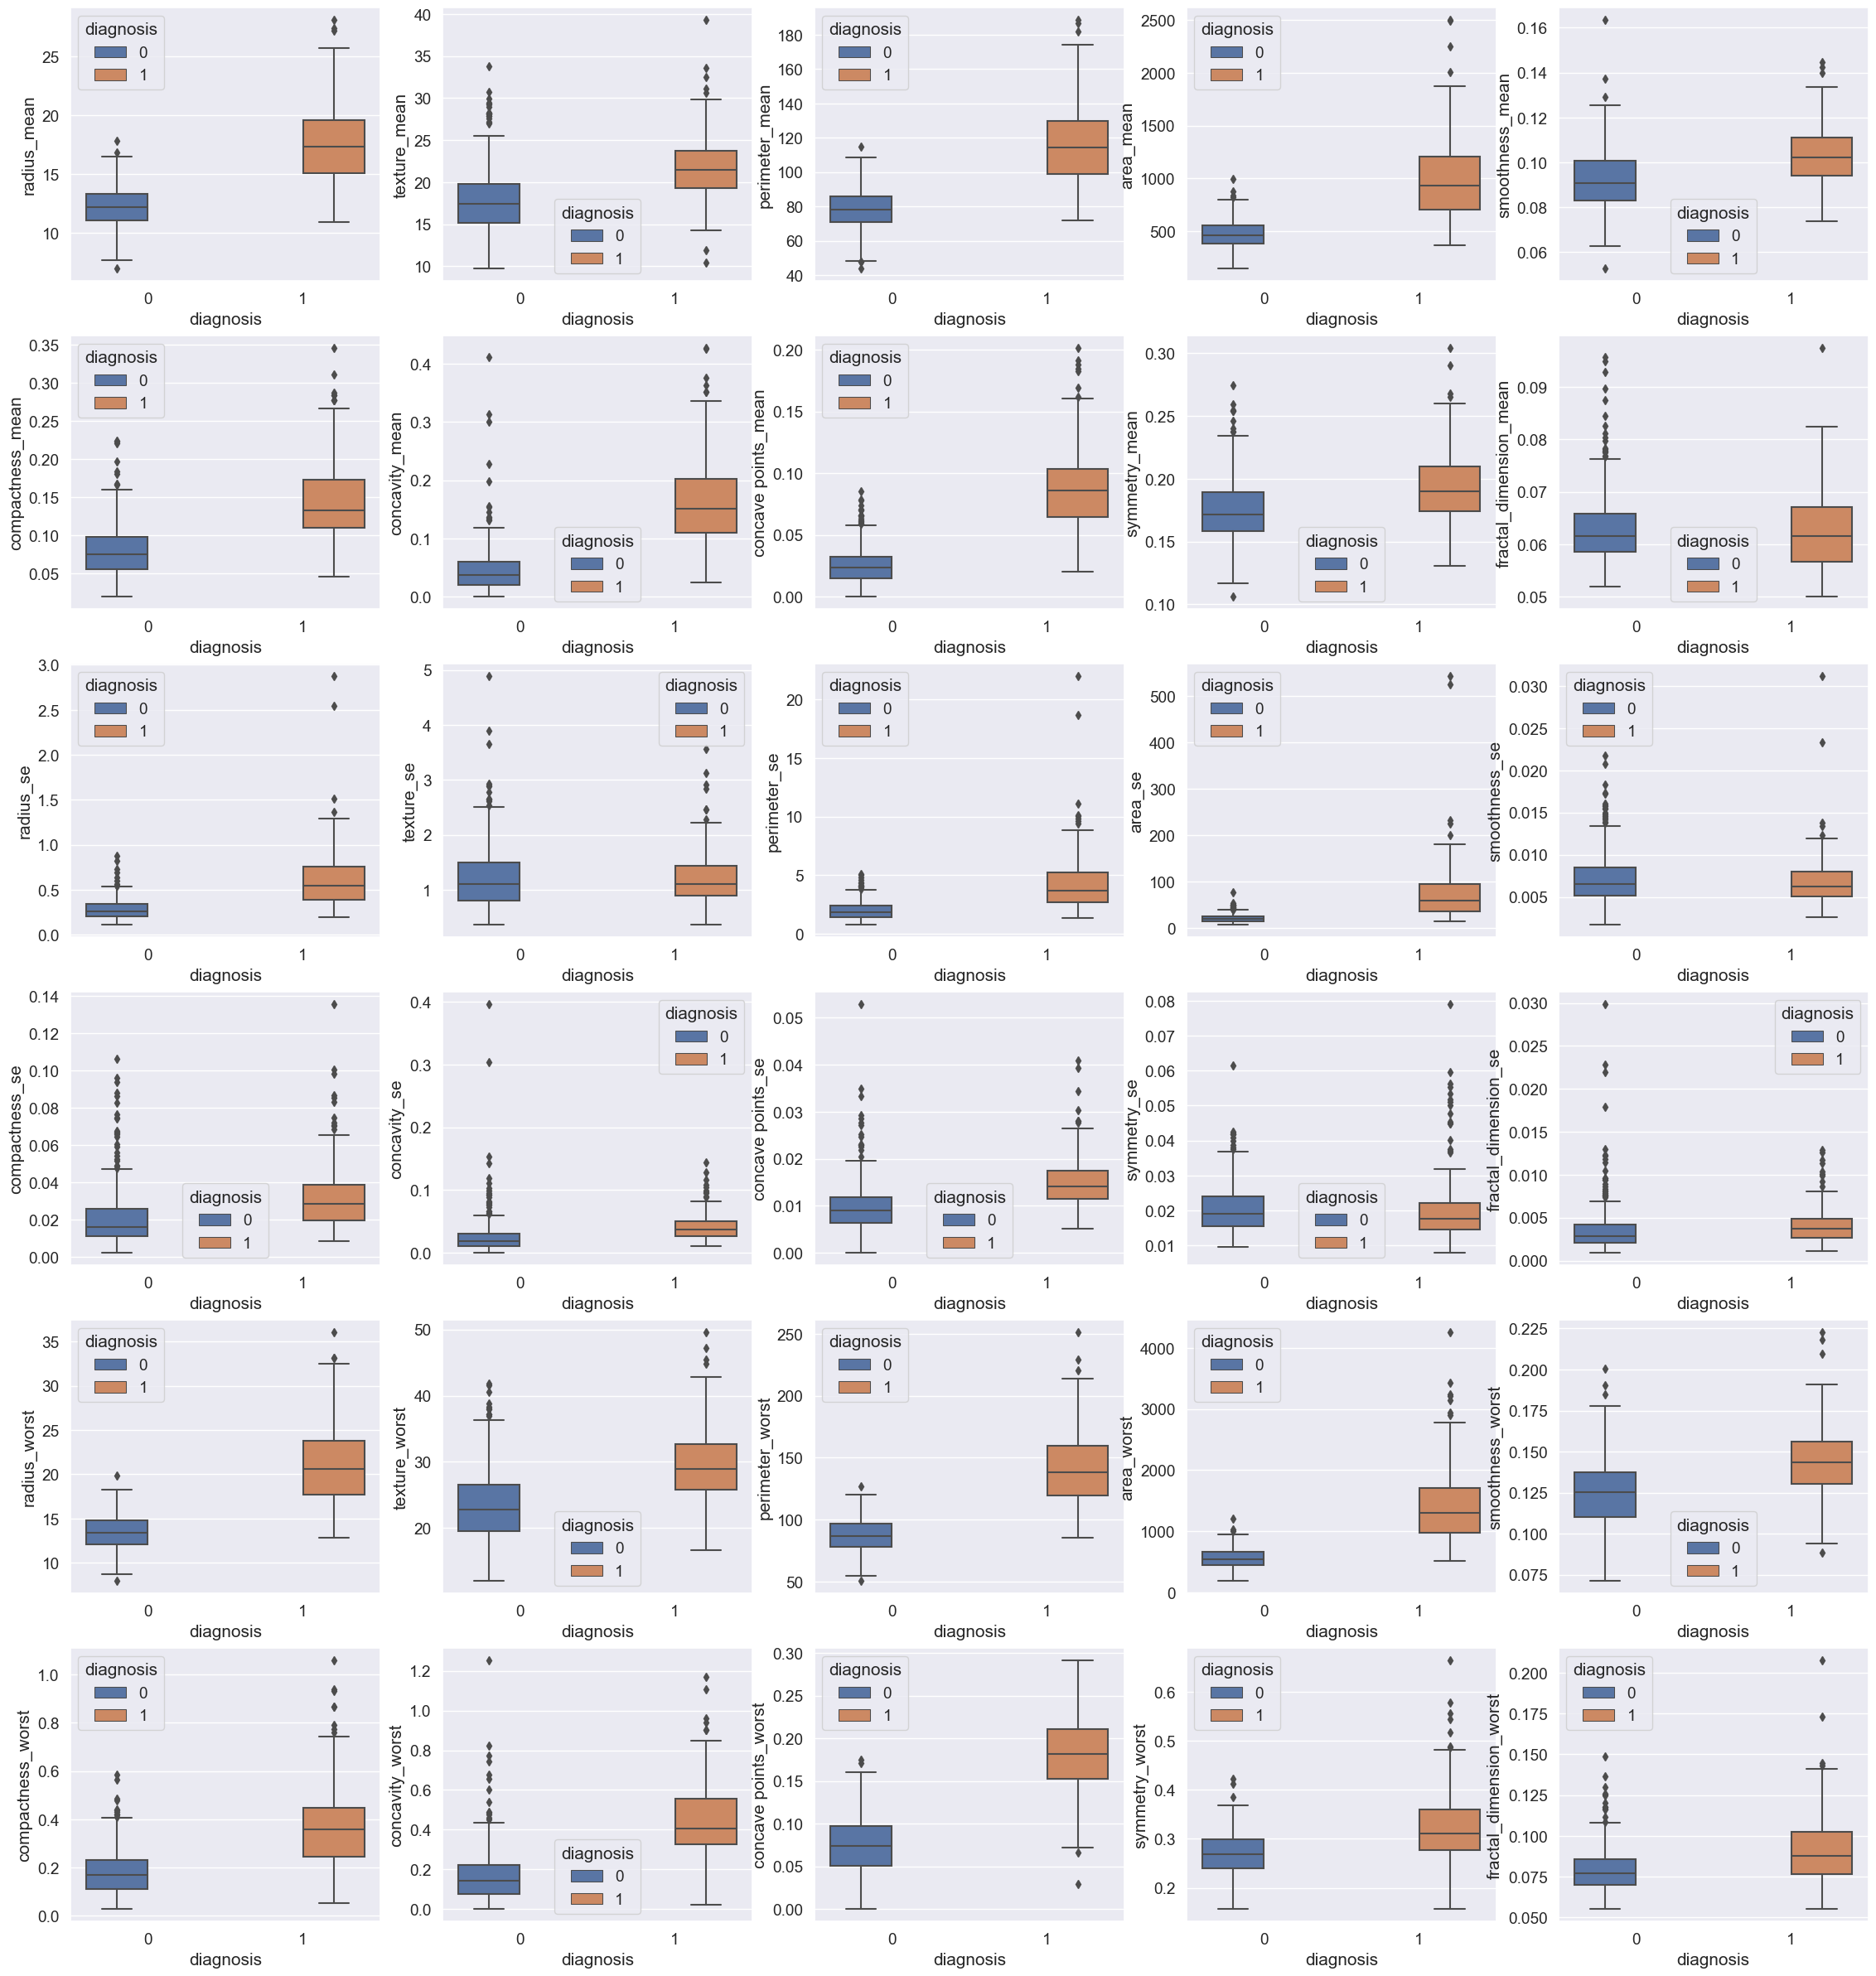

In [16]:
plt.figure(figsize=(28, 30))

for i_col in range(len(X_columns)):
    
    plt.subplot(6, 5, i_col+1)
    
    sns.boxplot(data=df, x='diagnosis', y=df[X_columns[i_col]], hue='diagnosis')
    
plt.show()

Думаю, что стоит оставить фичи с постфиксом "_worst", потому что в обнаружении злокачественных образований, мне кажется, важнее наибольшие/наихудшие результаты измерений. Но признаки характеризующие размер тоже сильно кореллируют между собой, поэтому оставлю из них только один - area.  

In [17]:
X_columns = [col for col in X_columns if re.match('^.*(?<!(perimeter|radius))_worst$', col)]
X_columns

['texture_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Теперь переходим к подготовке данных для модели.  

Разобьем данные на train и test.  

In [18]:
X = df[X_columns].values
y = df[y_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

Выше уже проверялось, что данные в разном масштабе. Поэтому проведем нормировку данных.  

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Попробуем обучить классификатор kNN "из коробки" и оценить его метрики качества.  

In [20]:
def quality(prediction_y, true_y):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    roc_auc = roc_auc_score(prediction_y, true_y)
    print(f'Accuracy: {round(accuracy, 3)}\
          \nPrecision: {round(precision, 3)}\
          \nRecall: {round(recall, 3)}\
          \nF1-score: {round(f1, 3)}\
          \nROC-AUC: {round(roc_auc, 3)}')

In [21]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [22]:
quality(y_pred_knn, y_test)

Accuracy: 0.947          
Precision: 0.921          
Recall: 0.935          
F1-score: 0.928          
ROC-AUC: 0.945


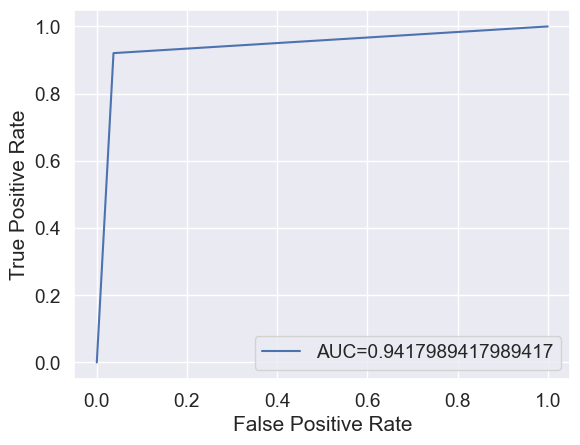

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, y_pred_knn)

plt.plot(fpr, tpr, label=("AUC="+str(roc_auc)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Проведем кросс-валидацию для определения оптимального числа соседей.  

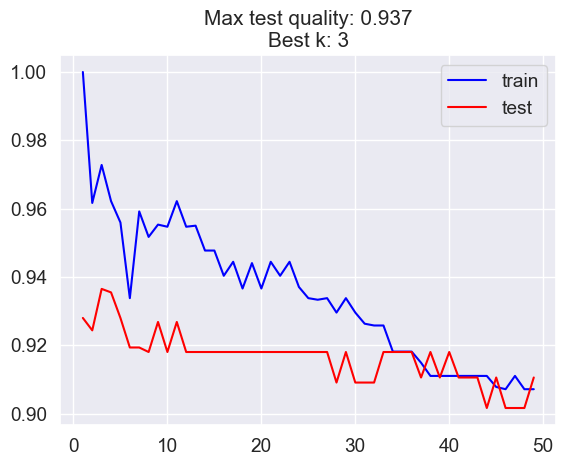

In [24]:
neighbors = range(1, 50)
f1_score_train = []
f1_score_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    f1_score_train.append(f1_score(knn.predict(X_train), y_train))
    f1_score_test.append(f1_score(knn.predict(X_test), y_test))
    
plt.plot(neighbors, f1_score_train, color='blue', label='train')
plt.plot(neighbors, f1_score_test, color='red', label='test')
plt.title(f'Max test quality: {round(max(f1_score_test), 3)}\nBest k: {np.argmax(f1_score_test)+1}')
plt.legend();

Обучим модель kNN с новыми настройками.  

In [25]:
knn_ = KNeighborsClassifier(n_neighbors=3)
knn_.fit(X_train, y_train)
y_pred_knn_ = knn_.predict(X_test)

In [26]:
quality(y_pred_knn_, y_test)

Accuracy: 0.953          
Precision: 0.937          
Recall: 0.937          
F1-score: 0.937          
ROC-AUC: 0.95


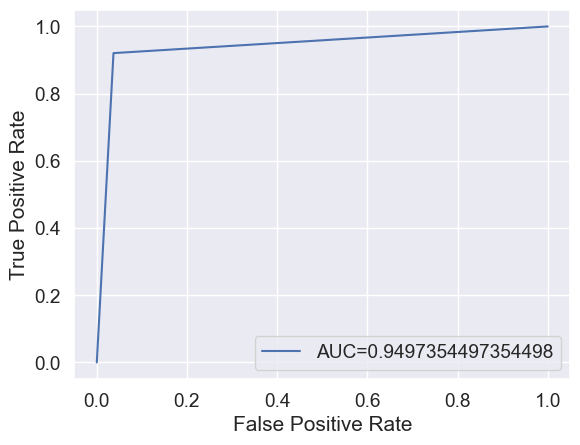

In [27]:
fpr_, tpr_, _ = roc_curve(y_test, y_pred_knn_)
roc_auc_ = roc_auc_score(y_test, y_pred_knn_)

plt.plot(fpr, tpr, label=("AUC=" + str(roc_auc_)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Как видно, подобранное на кросс-валидации число соседей действительно улучшило метрики :)  

Перейдем к бонусному заданию.  
Линейно-зависимые признаки были уже убраны. Поэтому сразу попробуем построить модель логистической регрессии "из коробки".   

In [28]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [29]:
quality(y_pred_log_reg, y_test)

Accuracy: 0.977          
Precision: 0.968          
Recall: 0.968          
F1-score: 0.968          
ROC-AUC: 0.975


Видно, что модель логистической регресии даже без настройки параметров показывает лучшие метрики, чем настроенный kNN.  

Визуализируем влияние признаков на целевую переменную.  

<AxesSubplot:xlabel='feature'>

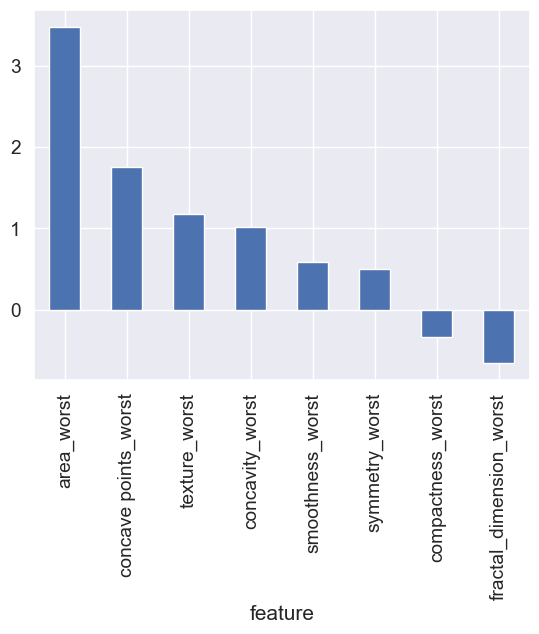

In [30]:
featureImportance = pd.DataFrame({'feature': X_columns, 
                                  'importance': log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot.bar()

Как было замечено на этапе EDA, больше всего влияет на целевую переменную признак относящийся к размеру образования.  

Теперь попробуем подобрать параметры для модели на кросс-валидации.  

In [31]:
parameters = {'C': [0.001, 0.01, 0.1, 1]}
log_reg_cv = LogisticRegression(random_state=42)
clf = GridSearchCV(log_reg_cv, parameters, scoring = 'f1', cv = 23)
clf.fit(X_train, y_train)

GridSearchCV(cv=23, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1]}, scoring='f1')

In [32]:
print(f'Best C: {clf.best_params_}\nBest score: {clf.best_score_}')

Best C: {'C': 1}
Best score: 0.9619529021702936


Видно, что подобранное оптимальное значение параметра C соответствует значению по умолчанию.  
Посмотрим, изменятся ли метрики.  

In [33]:
log_reg_cv = LogisticRegression(C=1., random_state=42)
log_reg_cv.fit(X_train, y_train)
y_pred_log_reg_cv = log_reg_cv.predict(X_test)

In [34]:
quality(y_pred_log_reg_cv, y_test)

Accuracy: 0.977          
Precision: 0.968          
Recall: 0.968          
F1-score: 0.968          
ROC-AUC: 0.975


<AxesSubplot:xlabel='feature'>

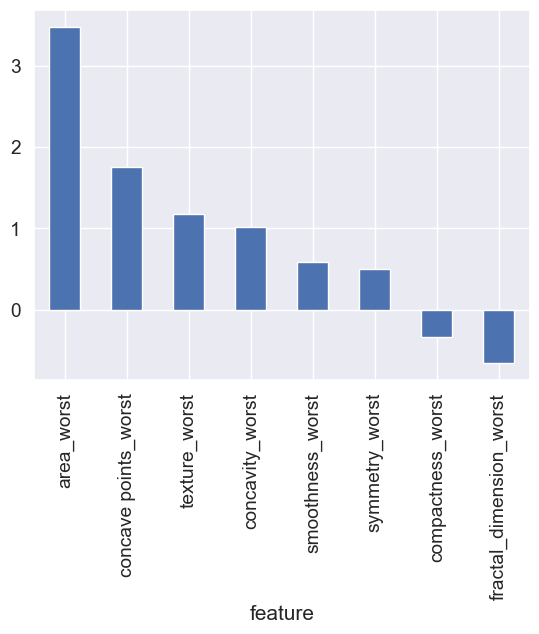

In [35]:
featureImportance = pd.DataFrame({'feature': X_columns, 
                                  'importance': log_reg_cv.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(['importance'], ascending=False, inplace=True)
featureImportance['importance'].plot.bar()

Метрики и визуализация влияния признаков на целевую переменную не изменились и совпадают с первой моделью логистической регрессии.  

Вывод: логистическая регрессия справляется с задачей лучше.  
Почему так? Мне кажется, что вероятностная оценка принадлежности к классу даёт более точные результаты, нежели определение класса по количеству соседей.  